这里完成ols部分

In [20]:
"""
最小二乘法进行回归
"""
import numpy as np
import pandas as pd
train_input_txt = pd.read_table('train_input.txt',header = None)
output_txt = pd.read_table('output.txt',header = None)

In [21]:
# 变成数组形式
import preprocess
train_input=np.loadtxt('train_input.txt',dtype=np.float32)
train_input[np.isnan(train_input)] = -1
train_input = preprocess.smaller_than_zero(train_input)
output=np.loadtxt('output.txt',dtype=np.float32)

nan count -> 2


In [22]:
data_train=pd.DataFrame(train_input)
data_output=pd.DataFrame(output)
data_train.describe()

,0,1,2,3,4,5,6
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,0.267261,0.666737,0.580088,0.477875,0.692120,0.677661,0.649399
std,0.094676,0.037017,0.212365,0.115487,0.103215,0.154045,0.166252
min,0.008426,0.557551,0.001440,0.165742,0.051885,0.115021,0.078406
25%,0.216242,0.647887,0.456182,0.376166,0.666106,0.563542,0.527144
50%,0.247621,0.665164,0.622178,0.476069,0.712823,0.721214,0.694653
75%,0.295794,0.683569,0.727721,0.551845,0.742041,0.791088,0.774855
max,0.812926,1.381089,1.349245,0.976177,1.227174,1.203539,1.399412


In [23]:
data_output.describe()

,0
count,1596.000000
mean,0.258099
std,0.137538
min,0.019020
25%,0.178341
50%,0.244987
75%,0.296984
max,1.000000


In [24]:
data_train.columns=['A','B','C','D','E','F','G']
data_output.columns = ['Y']

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     34.12
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           1.65e-44
Time:                        18:51:19   Log-Likelihood:                 1013.9
No. Observations:                1596   AIC:                            -2012.
Df Residuals:                    1588   BIC:                            -1969.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3060      0.068      4.487      0.0

D:\anaconda\envs\learn_tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


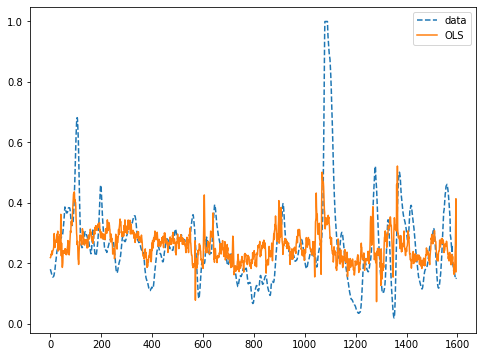

In [25]:
from matplotlib import pyplot as plt

x = data_train[['A','B','C','D','E','F','G']]
y = data_output[['Y']]
x[np.isnan(x)] = 0
x[np.isinf(x)] = 0
y[np.isnan(y)] = 0
y[np.isinf(y)] = 0
import statsmodels.api as sm
x=sm.add_constant(x)
est=sm.OLS(y,x)
model=est.fit()#建立最小二乘回归模型
print(model.summary())
y_fitted = model.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y, '--', label='data')
ax.plot(y_fitted, '-',label='OLS')
ax.legend(loc='best')


In [26]:
test_input_txt = pd.read_table('test_input.txt',header = None)
test_input=np.loadtxt('test_input.txt',dtype=np.float32)
data_test=pd.DataFrame(test_input)
data_test.describe()


,0,1,2,3,4,5,6
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,0.317369,0.671641,0.635688,0.352175,0.591209,0.507335,0.470041
std,0.110661,0.090869,0.162876,0.142608,0.142461,0.122640,0.117860
min,0.040359,0.031766,0.174480,0.000282,0.001254,0.015904,0.010062
25%,0.258151,0.667573,0.545045,0.357026,0.531429,0.432439,0.396137
50%,0.305178,0.685803,0.625497,0.364650,0.619565,0.493633,0.466793
75%,0.360525,0.702688,0.749335,0.375342,0.690893,0.570895,0.535680
max,1.001941,0.782632,0.965611,1.133764,0.897153,0.926988,0.851098


D:\anaconda\envs\learn_tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


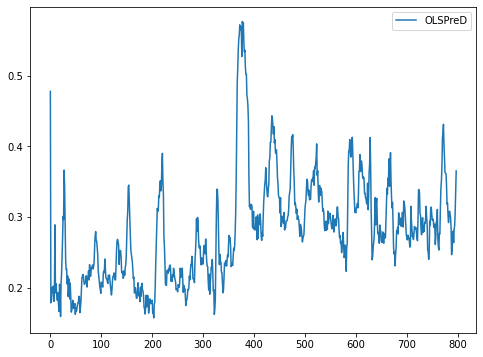

In [27]:
data_test.columns=['A','B','C','D','E','F','G']
xx = data_test[['A','B','C','D','E','F','G']]
xx=sm.add_constant(xx)
xx[np.isnan(xx)] = 0
xx[np.isinf(xx)] = 0
from matplotlib import pyplot as plt
import statsmodels.api as sm
y_test = model.predict(xx)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y_test, '-',label='OLSPreD')
ax.legend(loc='best')


In [28]:
# y_test.to_excel("test_ols.xlsx")
y_test = pd.DataFrame(y_test)
y_test.index = np.linspace(1,798,798)
y_test.to_csv("test_ols.csv")